# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

This data, taken from the College Board, gives the mean SAT math and verbal scores, and the participation rate for each state and the District of Columbia for the year 2001. It also includes a summary column "ALL". We are unclear on the purpose and origin of these values.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

The data looks complete. As noted above there's an additional "All" row which we will look to remove in our calculations.

##### 3. Create a data dictionary for the dataset.

I'm not sure what this is asking.

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [1]:
import csv
import numpy as np
import scipy.stats as stats
# open the csv file and use csv.reader to create a csv_reader object.
f = open("/Users/gregorymaclennan/DSI-course-materials/curriculum/03-projects/01-projects-weekly/project-01/assets/sat_scores.csv", "rU")
sat_scores = csv.reader(f)
sat_scores = list(sat_scores) # use the list() function to create a list of lists

##### 5. Print the data

In [2]:
print sat_scores # print the data

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [3]:
# extract the first row (the header row) and remove it from the dataset
sat_scores.pop(0)
# we are also going to pop the All column so that we don't accidentally include this in our calculations.
sat_scores.pop(len(sat_scores)-1)

""" **NOTE** this will remove the first and last row in the dataset so make sure you only run this once. If you run 
this twice, without reloading the original dataset, you will pop off the 'CT' row and 'MS' row respectively """

" **NOTE** this will remove the first and last row in the dataset so make sure you only run this once. If you run \nthis twice, without reloading the original dataset, you will pop off the 'CT' row and 'MS' row respectively "

In [4]:
print sat_scores # print again just to make sure the dataset looks ok

[['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12', '550', '550'], ['WY', '11', '547',

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [5]:
# for each row in the sat_scores dataset take the first element and assign it to the new list state_names.
state_names = []
for row in sat_scores:
    state_names.append(row[0])

##### 8. Print the types of each column

In [13]:
# I'm not quite sure I understand the instructions but this is my best interpretation
# for the first row (header row) in sat_scores iterate through those items and print the type of each item
for row in sat_scores[0]:
    print type(item)

<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [14]:
# the data in column's 2,3 & 4 should be converted to type int
for row in sat_scores:
    for i in range(1,4): # only allow i to be 1, 2 or 3. Ensuring the state column is not affected.
        row[i] = int(row[i])
        
# print sat_scores

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [15]:
# create three separate dictionaries for each column
# initialize the empty dictionaries
rate_dict_by_state = {}
verb_dict_by_state = {}
math_dict_by_state = {}

for row in sat_scores:
    # iterate through each row and assign the first item in each row to the corresponding column values
    # for each dictionary.
    rate_dict_by_state[row[0]] = row[1]
    verb_dict_by_state[row[0]] = row[2]
    math_dict_by_state[row[0]] = row[3]

##### 11. Create a dictionary with the values for each of the numeric columns

In [16]:
# create 3 blank dictionaries for rank, verb and math.
rate_dict = {}
verb_dict = {}
math_dict = {}

for row in sat_scores:
    # 
    rate_dict.setdefault("Rate", []).append(row[1])
    verb_dict.setdefault("Verbal", []).append(row[2])
    math_dict.setdefault("Math", []).append(row[3])

# print rate_dict
# print math_dict
# print verb_dict


## Step 3: Describe the data

##### 12. Print the min and max of each column

In [17]:
# takes the keys "Verbal", "Math" and "Rate" from the respective dictionaries
# and performs max & min calculations on the returned values (which in this case are lists)
print "Max Verbal score:", max(verb_dict["Verbal"])
print "Min Verbal score:", min(verb_dict["Verbal"]) 
print "Max Math score:", max(math_dict["Math"]) 
print "Min Math score:", min(math_dict["Math"]) 
print "Max participation rate:", max(rate_dict["Rate"])
print "Min participation rate:", min(rate_dict["Rate"])

Max Verbal score: 593
Min Verbal score: 482
Max Math score: 603
Min Math score: 439
Max participation rate: 82
Min participation rate: 4


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [18]:
# create a function that takes a list as an input and will output the std. dev
def std_dev(input_list):
    """Takes a list and computes the standard deviation value"""
    list_mean = np.mean(input_list) # calc the mean for the input list
    var_squared = [(i-list_mean)**2 for i in input_list] # calc the variance squared value
    # sum the var^2 value, divide by n (i.e. the length of the list)
    # then take the square root of that value, and return the result
    res = (sum(var_squared)/len(input_list))**0.5 
    return res

print "Verbal standard deviation:", std_dev(verb_dict["Verbal"])
print "Math standard deviation:", std_dev(math_dict["Math"])
print "Rate standard deviation:", std_dev(rate_dict["Rate"])

Verbal standard deviation: 33.0319826842
Math standard deviation: 35.9298731731
Rate standard deviation: 27.2792386761


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

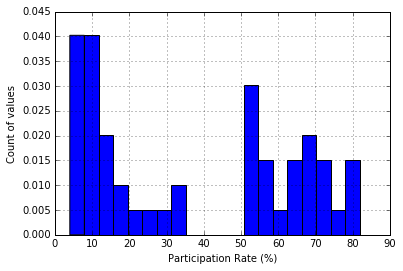

In [21]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.hist(rate_dict["Rate"], 20, normed=True, facecolor="b")
plt.xlabel('Participation Rate (%)')
plt.ylabel('Count of values')
plt.grid(True)
plt.show()

##### 15. Plot the Math distribution

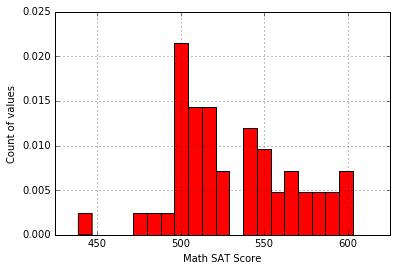

In [29]:
plt.hist(math_dict["Math"], 20, normed=True, facecolor="r")
plt.xlabel('Math SAT Score')
plt.ylabel('Count of values')
plt.axis([425,625,0,0.025])
plt.grid(True)
plt.show()

##### 16. Plot the Verbal distribution

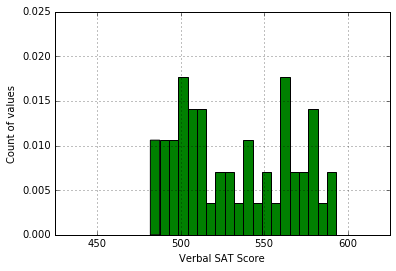

In [28]:
plt.hist(verb_dict["Verbal"], 20, normed=True, facecolor="g")
plt.xlabel('Verbal SAT Score')
plt.ylabel('Count of values')
plt.axis([425,625,0,0.025])
plt.grid(True)
plt.show()

##### 17. What is the typical assumption for data distribution?

In general it's typical to assume that the data would follow a normal distribution.

##### 18. Does that distribution hold true for our data?

That distribution does not hold true for all of our plots here. The rate distribution in particular is far from a normal distribution. 

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

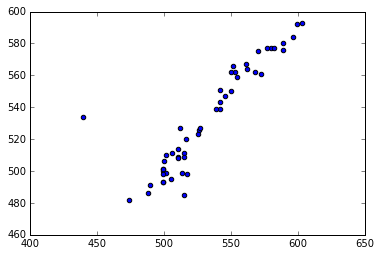

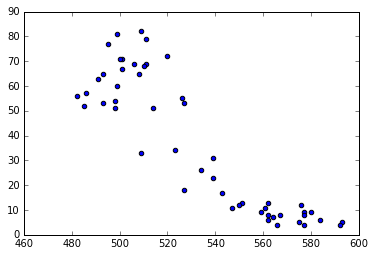

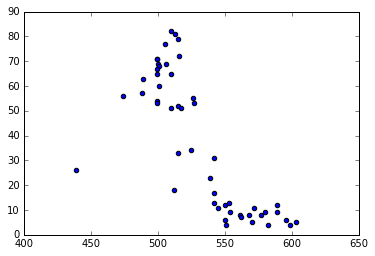

In [65]:
plt.scatter(math_dict["Math"], verb_dict["Verbal"])
plt.show()

plt.scatter(verb_dict["Verbal"], rate_dict["Rate"])
plt.show()

plt.scatter(math_dict["Math"], rate_dict["Rate"])
plt.show()

##### 20. Are there any interesting relationships to note?

There seems to be a strong correlation between how a state performs on the Math section and how they perform on the Verbal section. In addition there's an weak correlation between the participation rate and the scores for both Math and Verbal.

##### 21. Create box plots for each variable. 

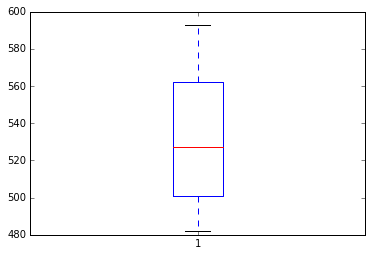

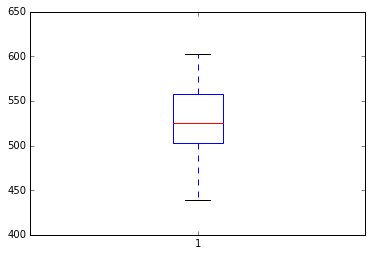

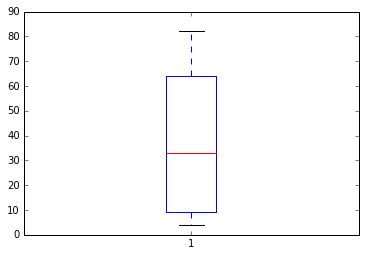

In [89]:
plt.boxplot(verb_dict["Verbal"])
plt.show()
plt.boxplot(math_dict["Math"])
plt.show()
plt.boxplot(rate_dict["Rate"])
plt.show()

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

In [90]:
%%bash
open /Users/gregorymaclennan/desktop/SAT_scores_by_state.twb